In [1]:
import pandas as pd
import numpy as np
import itertools

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from matplotlib import gridspec
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
def ngfbfc_processing(df):
    try:
        if "type" in df.columns.to_list():
            df = df.rename(columns={"type": "NGFBFC"}) 

        if 'NGFBFC' in df.columns:
            df['NGFBFC'] = df['NGFBFC'].str.lower()
            df['NGFBFC'] = df['NGFBFC'].replace('grass', 'pasture')
            df['NGFBFC'] = df['NGFBFC'].replace("oil & palm fruit", "palm oil")
            df['NGFBFC'] = df['NGFBFC'].replace("other non-food & luxury & spices", "non food, luxury, spices")
            df['NGFBFC'] = df['NGFBFC'].replace('other temperate cereals', 'temperate cereals')
        return df
    except Exception as e:
        print(f"error: {e}")
        return df


def region_processing(df):
    try:
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].str.lower()
        return df
    except Exception as e:
        print(f"error: {e}")
        return df

def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0


def get_top_n(df, category_col, value_col, n=3):
    return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)

def get_angular_position(NGFBFC_name, NGFBFCs_list):
    """Calculate the angular position of a NGFBFC in the chart"""
    idx = NGFBFCs_list.index(NGFBFC_name)
    return (idx * 360.0 / len(NGFBFCs_list) + 90) % 360


In [13]:
carbon_footprint_1 = pd.read_excel(r"D:\kerja\asisten riset\code rev\CF_emisitotal_AH_14Jan_years_minus.xlsx") #sama kyk diatas tp multitahun

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_13260/1777898468.py:81: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_13260/1777898468.py:266: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_13260/1777898468.py:327: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


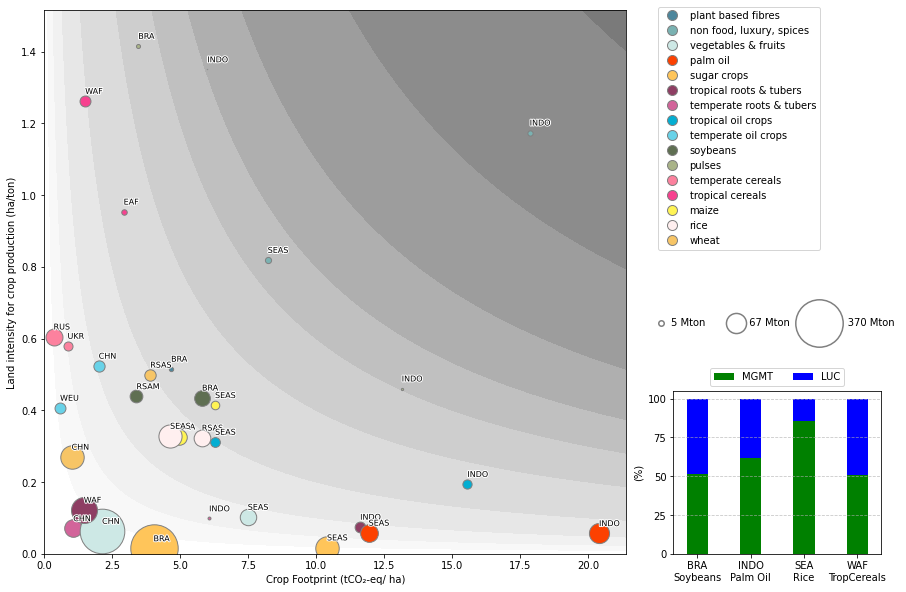

In [3]:
GECH4RI = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECH4RI_rice_category_annual_gtco2eq.xlsx")
GECO2AB_CH4 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECO2AB_crop_category_annual_gtco2eq_CH4_13Jan.xlsx")
GECO2AB_N2O = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECO2AB_crop_category_annual_gtco2eq_N2O_13Jan.xlsx")
GEC2OLC = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GEN2OLC_crop_category_annual_gtco2eq.xlsx")
GEN2ORE = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GEN2ORE_crop_category_annual_gtco2eq_13Jan.xlsx")
GFERTYN = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GFERTSYN_crop_category_annual_gtco2eq.xlsx")
GMANURE = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GMANURE_crop_category_annual_gtco2eq.xlsx")
LUC_agri = pd.read_excel("D:/kerja/asisten riset/code v/review/data/LUC_agri_crop_category_annual_gtco2eq.xlsx")
agri_to_agri = pd.read_excel("D:/kerja/asisten riset/code v/review/data/agri2agri_crop_category_annual_gtco2eq.xlsx")
peat_CH4 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_CH4_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_CO2 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_CO2_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_DOC = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_DOC_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_N2O = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_N2O_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
country_code = pd.read_excel("../FULL_RUN/INPUT_DATA/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")

carbon_footprint = pd.read_excel("D:/kerja/asisten riset/code v/review/data/CF_clean_sesuai_v2.xlsx")
areaharvested = pd.read_excel("D:/kerja/asisten riset/code v/review/data/REV_fao_stat_area_harvested_mov_average_REGION.xlsx")
production = pd.read_excel("D:/kerja/asisten riset/code v/review/data/REV_fao_stat_production_mov_average_v2_REGION.xlsx")
areaharvested = areaharvested.rename(columns={"FAO Production": "Fao Area Harvested"})

start_year = 1975
end_year = 2021

columns = ['IMAGE Region Name', 'time', 'NGFBFC']

colors = {'plant based fibres': '#4D869C',
          'non food, luxury, spices': '#7AB2B2',
          'vegetables & fruits': '#CDE8E5',
          'palm oil': '#FC4100',
          'sugar crops': '#FFC55A',
          'tropical roots & tubers': '#8E3E63',
          'temperate roots & tubers': '#D2649A',
          'tropical oil crops': '#03AED2',
          'temperate oil crops': '#68D2E8',
          'soybeans': '#5F6F52',
          'pulses': '#A9B388',
          'temperate cereals': '#FC819E',
          'tropical cereals': '#F7418F',
          'maize': '#FFF455',
          'rice': '#FFEFEF',
          'wheat': '#F7C566'}

columns_to_multiply = [int(year) for year in range(start_year, end_year, 5)]

all_sources = pd.concat([LUC_agri, GEC2OLC, GECH4RI, GECO2AB_CH4, GECO2AB_N2O, GEN2ORE, GFERTYN, GMANURE, peat_CH4, peat_CO2, peat_DOC, peat_N2O, agri_to_agri], ignore_index=True)

df_LUC = all_sources[(all_sources['emissions'] == 'LUC_Agri') | (all_sources['emissions'] == 'agri2agri') | (all_sources['emissions'] == 'GEN2OLC')]
df_LUC = df_LUC.groupby(['IMAGE Region Name', 'type']).sum()
df_LUC = df_LUC.reset_index()
df_LUC = df_LUC.drop(columns=['emissions'])
df_LUC.loc[:, columns_to_multiply] = df_LUC.loc[:, columns_to_multiply] * 5
df_LUC_melt = df_LUC.melt(id_vars=['IMAGE Region Name', 'type'], var_name='time', value_name='value')
df_LUC_melt_droptime = df_LUC_melt.drop(columns=['time'])
df_LUC_melt_droptime = df_LUC_melt_droptime.groupby(['IMAGE Region Name', 'type']).sum()
df_LUC_index = df_LUC_melt_droptime.reset_index()
df_LUC_index.loc[:, 'emissions'] = "LUC"

df_AGRI = all_sources[~(all_sources['emissions'] == 'LUC_Agri') | ~(all_sources['emissions'] == 'agri2agri') | ~(all_sources['emissions'] == 'GEN2OLC')]
df_AGRI = df_AGRI.groupby(['IMAGE Region Name', 'type']).sum()
df_AGRI = df_AGRI.reset_index()
df_AGRI = df_AGRI.drop(columns=['emissions'])
df_AGRI.loc[:, columns_to_multiply] = df_AGRI.loc[:, columns_to_multiply] * 5
df_AGRI_melt = df_AGRI.melt(id_vars=['IMAGE Region Name', 'type'], var_name='time', value_name='value')
df_agrim_melt_droptime = df_AGRI_melt.drop(columns=['time'])
df_agrim_melt_droptime = df_agrim_melt_droptime.groupby(['IMAGE Region Name', 'type']).sum()
df_agrim_index = df_agrim_melt_droptime.reset_index()
df_agrim_index.loc[:, 'emissions'] = "AGRI"

data_2kategori = pd.concat([df_agrim_index, df_LUC_index], ignore_index=True)
data_2kategori_drop = data_2kategori.drop(columns=['emissions'])
data_2kategori_sum = data_2kategori_drop.groupby(['IMAGE Region Name', 'type']).sum()
data_2kategori_sum_index = data_2kategori_sum.reset_index()
data_2kategori_sum_index['type'] = data_2kategori_sum_index['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil')
data_2kategori_sum_index['type'] = data_2kategori_sum_index['type'].replace('other temperate cereals', 'temperate cereals')
data_2kategori_sum_index['IMAGE Map'] = data_2kategori_sum_index['IMAGE Region Name']
data_2kategori_sum_index = region_processing(data_2kategori_sum_index)
data_2kategori_sum_index['IMAGE Classification Region'] = data_2kategori_sum_index['IMAGE Region Name'] + "-" + data_2kategori_sum_index['type']
data_2kategori_sum_index = data_2kategori_sum_index[data_2kategori_sum_index['IMAGE Classification Region'] != 'indonesia region-temperate cereals'] #drop karena tidak ada produksi di FAO

def get_top_n(df, category_col, value_col, n):
    return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)
df_top3 = get_top_n(data_2kategori_sum_index, 'type', 'value', 2)

region_code_map = country_code.set_index('IMAGE Region Name')['IMAGE Region Code'].to_dict()
df_top3['IMAGE Map'] = df_top3['IMAGE Map'].map(region_code_map)
df_top3 = df_top3[df_top3['type'] != 'pasture']
df_top3 = df_top3.drop(columns=['IMAGE Region Name'])

columns2 = ['plant based fibres', 'other non-food & luxury & spices', 'vegetables & fruits', 'palm oil',
            'sugar crops', 'tropical roots & tubers', 'temperate roots & tubers', 'tropical oil crops',
            'temperate oil crops', 'soybeans', 'pulses', 'temperate cereals', 'tropical cereals', 'maize', 'rice',
            'wheat', 'pasture']

colors2 = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', '#8E3E63', '#D2649A', '#03AED2', 
'#68D2E8', '#5F6F52', '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', '#F7C566', '#ACE1AF']

color_mapping = dict(zip(columns2, colors2))
def get_color(plant_type):
    return color_mapping.get(plant_type, 'unknown')

df_top3['color'] = df_top3['type'].apply(get_color)
df_pallete = df_top3.copy()

yield_raw = production.copy()
for region, time, ngfbfc in zip(yield_raw["IMAGE Region Name"].to_list(), yield_raw["time"].to_list(), yield_raw["NGFBFC"].to_list()):
    try:
        data1 = areaharvested[(areaharvested['IMAGE Region Name'] == region) & (areaharvested['time'] == time) & (areaharvested['NGFBFC'] == ngfbfc)]['Fao Area Harvested'].to_numpy()
        data2 = production[(production['IMAGE Region Name'] == region) & (production['time'] == time) & (production['NGFBFC'] == ngfbfc)]['FAO Production'].to_numpy()
        if data1.size == 0:
            data1 = [0]
        if data2.size == 0: 
            data2 = [0]
        mask = yield_raw[(yield_raw['IMAGE Region Name'] == region) & (yield_raw['time'] == time) & (yield_raw['NGFBFC'] == ngfbfc)].index
        yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]

    except (KeyError, ZeroDivisionError) as e:
        print(f"Error: {e} for region {region}")

yield_raw_1 = yield_raw.copy()
yield_raw_1 = yield_raw_1.drop(columns=['FAO Production'])
yield_raw_1 = yield_raw_1[yield_raw_1['time'] >= start_year]

yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.lower()
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("tropical roots and tubers", "tropical roots & tubers")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("vegetables or fruits", "vegetables & fruits")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("other temperate cereals", "temperate cereals")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("temperate roots and tubers", "temperate roots & tubers")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("plant-based fibers", "plant based fibres")
yield_raw_1['NGFBFC'] = yield_raw_1['NGFBFC'].str.replace("oil & palm fruit", "palm oil")

yield_raw_1 = region_processing(yield_raw_1)

yield_raw_copy = yield_raw_1.copy()
yield_raw_copy['IMAGE Classification Region'] = yield_raw_copy['IMAGE Region Name'] + "-" + yield_raw_copy['NGFBFC']
yield_raw_copy.rename(columns={'time': 'Year'}, inplace=True)
yield_raw_copy = yield_raw_copy.drop(columns=['IMAGE Region Name', 'NGFBFC'])
yield_raw_copy['value'] = yield_raw_copy['value'].fillna(0.0)
yield_FAO = yield_raw_copy[['Year', 'IMAGE Classification Region', 'value']]
yield_FAO  = yield_FAO[yield_FAO['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]

def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0

yield_FAO_average = yield_FAO.groupby(['IMAGE Classification Region'])['value'].apply(custom_mean).to_frame('value')
yield_FAO_average = yield_FAO_average.reset_index()
yield_FAO_average = yield_FAO_average[['IMAGE Classification Region', 'value']]
df2_array_selected = yield_FAO_average['value'].to_numpy()

carbon_footprint.rename(columns={'NGFBFC': 'type'}, inplace=True)
carbon_footprint['type'] = carbon_footprint['type'].str.replace("non food, luxury, spices", "other non-food & luxury & spices").replace("oil, palm fruit", "palm oil")
carbon_footprint = carbon_footprint[~carbon_footprint['type'].str.contains("pasture")]
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].str.lower()
carbon_footprint['IMAGE Classification Region'] = carbon_footprint['IMAGE Region Name'] + "-" + carbon_footprint['type']
carbon_footprint_group = carbon_footprint.groupby(["IMAGE Classification Region"]).sum()
carbon_footprint_group = carbon_footprint_group.reset_index()
carbon_footprint_group.rename(columns={'Mean': 'average'}, inplace=True)

carbon_footprint_group['average'] = carbon_footprint_group['average'].fillna(0)
carbon_footprint_group = carbon_footprint_group[['IMAGE Classification Region', 'average']]
carbon_footprint_array = carbon_footprint_group['average'].to_numpy()
carbon_footprint_group_sorted = carbon_footprint_group.sort_values(by='average', ascending=False)
carbon_footprint_  = carbon_footprint_group[carbon_footprint_group['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
carbon_footprint_array_selected = carbon_footprint_['average'].to_numpy()
carbon_footprint_ = pd.merge(left=carbon_footprint_, right=df_pallete, left_on="IMAGE Classification Region", right_on="IMAGE Classification Region", how="left")

years = [x for x in range(1975, 2021, 5)]
crops = [x for x in carbon_footprint_group['IMAGE Classification Region'].unique()]
combinations = list(itertools.product(years, crops))
df_new = pd.DataFrame(combinations, columns=['Year', 'IMAGE Classification Region'])
df_new["value"] = 0.0
df_new_copy2 = df_new.copy()
df_new_copy2 = df_new_copy2.merge(yield_FAO, how='left', left_on=['Year', 'IMAGE Classification Region'], right_on=['Year', 'IMAGE Classification Region'])
df_new_copy2['value'] = df_new_copy2['value_y'].fillna(0.0)
df_new_copy2 = df_new_copy2.drop(columns=['value_y', 'value_x'])
df_new_copy2 = pd.pivot_table(data=df_new_copy2, columns="Year", index=["IMAGE Classification Region"], values="value").reset_index()
df_new_copy2['average'] = df_new_copy2.iloc[:, 1:].mean(axis=1)
df_new_copy2['average'] = df_new_copy2['average'].fillna(0)
df_new_copy2 = df_new_copy2[['IMAGE Classification Region', 'average']]
df_2_sort = df_new_copy2.sort_values(by='average', ascending=False)
df2_array = df_new_copy2['average'].to_numpy()
df2_isin = df_new_copy2[df_new_copy2['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
df2_array_selected = df2_isin['average'].to_numpy()

df2_colour = pd.merge(left=df2_isin, right=df_pallete, left_on="IMAGE Classification Region", right_on="IMAGE Classification Region", how="right")
df2_colour = df2_colour.sort_values(by='IMAGE Classification Region', ascending=True)

production_raw = production.copy()
production_raw = region_processing(production_raw)
production_raw['NGFBFC'] = production_raw['NGFBFC'].str.lower()
production_raw['NGFBFC'] = production_raw['NGFBFC'].str.replace('oil & palm fruit', 'palm oil')
production_raw['NGFBFC'] = production_raw['NGFBFC'].str.replace('other non-food & luxury & spices', 'other non-food & luxury & spices')
production_raw['NGFBFC'] = production_raw['NGFBFC'].str.replace('other temperate cereals', 'temperate cereals')
production_raw['IMAGE Classification Region'] = production_raw['IMAGE Region Name'] + "-" + production_raw['NGFBFC']
production_raw = production_raw.drop(columns=['IMAGE Region Name', 'NGFBFC'])

production_copy = production_raw.copy()
production_copy = production_copy.groupby(['IMAGE Classification Region'])['FAO Production'].apply(custom_mean).to_frame('average')
production_copy = production_copy.reset_index()

df_norm = production_copy.copy()
df_norm = df_norm[['IMAGE Classification Region', 'average']]
df_norm_selected = df_norm[df_norm['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
df_norm_selected_test = df_norm_selected['average'].to_numpy()/1e7

df_agrim_melt_multiyear = df_AGRI_melt[((df_AGRI_melt['time'] > 1990))]
df_agrim_melt_multiyear = df_agrim_melt_multiyear.drop(columns=['time'])
df_agrim_groupby_multiyear = df_agrim_melt_multiyear.groupby(['IMAGE Region Name', 'type']).sum()
df_agrim_index_multiyear = df_agrim_groupby_multiyear.reset_index()
df_agrim_index_multiyear.loc[:, 'emissions'] = "AGRI"

df_LUC_melt_multiyear = df_LUC_melt[((df_LUC_melt['time'] > 1990))]
df_LUC_melt_multiyear = df_LUC_melt_multiyear.drop(columns=['time'])
df_LUC_groupby_multiyear = df_LUC_melt_multiyear.groupby(['IMAGE Region Name', 'type']).sum()
df_LUC_index_multiyear = df_LUC_groupby_multiyear.reset_index()
df_LUC_index_multiyear.loc[:, 'emissions'] = "LUC"

data_2kategori = pd.concat([df_agrim_index_multiyear, df_LUC_index_multiyear], ignore_index=True)

five_top_data_multiyear = data_2kategori[
    (data_2kategori['IMAGE Region Name'] == "Brazil") & (data_2kategori['type'] == "soybeans") 
  | (data_2kategori['IMAGE Region Name'] == "Indonesia") & (data_2kategori['type'] == "oil & palm fruit") 
  | (data_2kategori['IMAGE Region Name'] == "SE. Asia") & (data_2kategori['type'] == "rice") 
  | (data_2kategori['IMAGE Region Name'] == "W. Africa") & (data_2kategori['type'] == "tropical cereals") 
                                      
]
total_emissions = five_top_data_multiyear.groupby(['IMAGE Region Name', 'type'])['value'].sum()
total_emissions = total_emissions.reset_index()
total_emissions.columns = ['IMAGE Region Name', 'type', 'total_akumulatif']
five_top_data_multiyear = five_top_data_multiyear.merge(total_emissions, on=['IMAGE Region Name', 'type'])
five_top_data_multiyear['percentage'] = (five_top_data_multiyear['value'] / five_top_data_multiyear['total_akumulatif']) * 100
pivot_df = five_top_data_multiyear.pivot_table(index=['IMAGE Region Name', 'type'], columns='emissions', values='percentage', fill_value=0)
bar_width = 0.6 


fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.001, wspace=0.01, width_ratios=[7,0.5,2.5], height_ratios=[5,2,3])

countour_plot = fig.add_subplot(gs[:, :1])

crop_footprint = carbon_footprint_array
crop_footprint_selected = carbon_footprint_array_selected

yields = df2_array.flatten()
yields_selected = df2_array_selected.flatten()

land_effeciency = 1 / yields
land_effeciency_selected = 1 / yields_selected

n_points = 100
carbon_footprint_contour = np.linspace(0, np.max(crop_footprint_selected) + 1, n_points)
df2_contour = np.linspace(0, np.max(land_effeciency_selected) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour, df2_contour)
Z = X * Y 

class_ranges = [0.1, 0.2, 0.5, 1, 2, 4, 6, 8, 11, 17, 30, 40]

base_cmap = plt.cm.Greys
colors = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors)

norm = BoundaryNorm(class_ranges, ncolors=custom_cmap.N, clip=True)

contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')

# Add labels and title
countour_plot.set_xlabel('Crop Footprint (tCO₂-eq/ ha)')
countour_plot.set_ylabel('Land intensity for crop production (ha/ton)')
countour_plot.axis('on')

# Scatter plot for selected data points
for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['color'].to_list(), df2_colour['IMAGE Map'].to_list())):
    sizes = df_norm_selected_test[x] * 60
    countour_plot.scatter(crop_footprint_selected[x], land_effeciency_selected[x], color=data[1], edgecolors='grey', label=data[0], s=sizes)
    
    text = countour_plot.text(crop_footprint_selected[x], land_effeciency_selected[x] + 0.02, data[2], fontsize=8, color='black')
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])


legend_ax = fig.add_subplot(gs[0, 2])
legend_ax.axis('off') 
colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', '#8E3E63', '#D2649A', '#03AED2', 
           '#68D2E8', '#5F6F52', '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', '#F7C566']

legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='grey',markersize=10) for color in colors]
columns2 = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
            'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
            'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice', 'wheat']

legend_ax.legend(legend_handles, columns2, loc='lower left', bbox_to_anchor=(-0.10,0.1), ncol=1)

size_ax = fig.add_subplot(gs[1,2]) 
size_labels = ['5 Mton', ' 67 Mton','      370 Mton']
size_values = [30, 404.84181766, 2248.3112172]
for size, label in zip(size_values, size_labels):
    size_ax.scatter([], [], s=size, facecolor='white', edgecolor='grey', linewidth=1.5, label=label)  # Empty scatter for legend
size_ax.legend(loc='lower left', bbox_to_anchor=(-0.15,0.5), ncol=3, handletextpad=0, labelspacing=0, frameon=False)
size_ax.axis('off') 

ax_barchart = fig.add_subplot(gs[2, 2])
custom_labels = [
    "BRA\nSoybeans",
    "INDO\nPalm Oil",
    "SEA\nRice",
    "WAF\nTropCereals"]

pivot_df.plot(kind='bar', stacked=True, ax=ax_barchart, color=['green', 'blue',], legend=False, width=0.4)

ax_barchart.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax_barchart.set_xticks(range(len(custom_labels)))
ax_barchart.set_xticklabels(custom_labels, rotation=0)
ax_barchart.set_ylabel('(%)', fontsize=10)
ax_barchart.grid(axis='y', linestyle='--', alpha=0.7)
ax_barchart.tick_params(axis='y', labelsize=10)
ax_barchart.set_xlabel("")

bar_legend = ax_barchart.legend( ['MGMT', 'LUC'],
    bbox_to_anchor=(0.5, 1),  
    loc='lower center', 
    ncol=2,  
    title_fontsize=12,
    fontsize=10
)

plt.tight_layout()
plt.show()

add multiyears

4 study case

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_13260/3408622802.py:123: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')
C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_13260/3408622802.py:170: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = plt.contourf(X, Y, Z, levels=class_ranges_multiyear,cmap=custom_cmap, norm=norm_multiyear, edgecolors='Black')


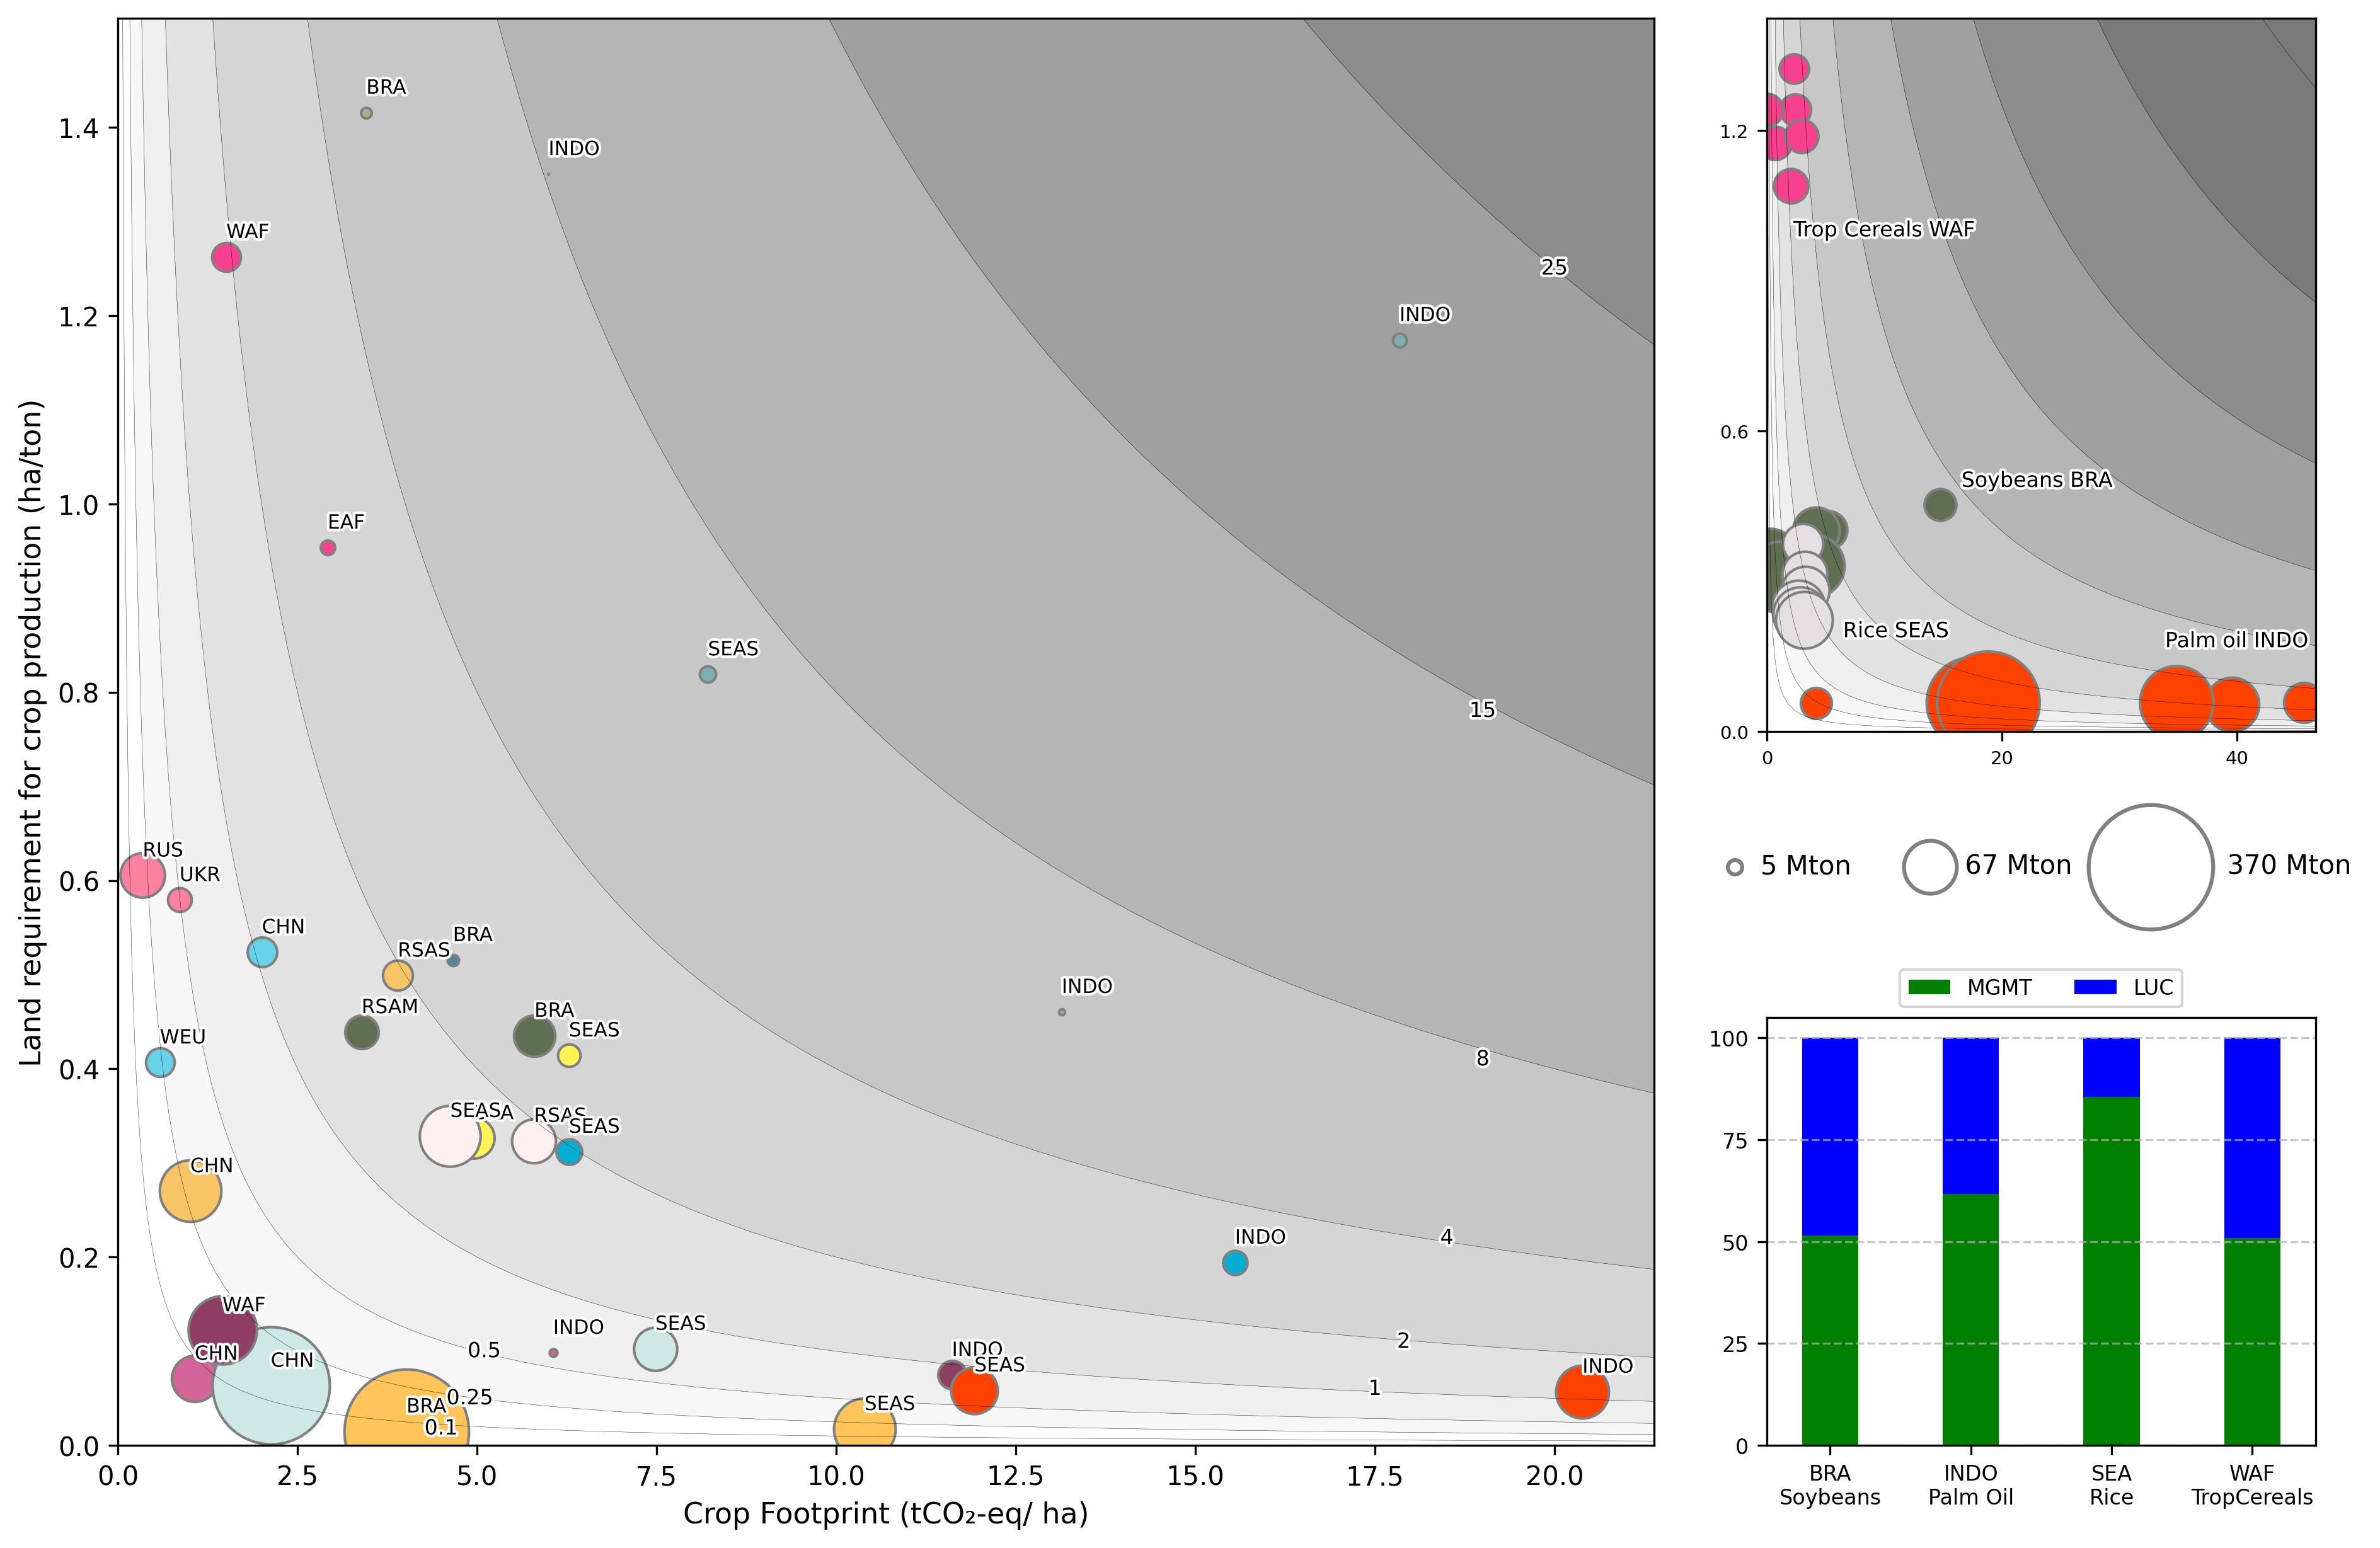

In [25]:
palette = {
   'Indonesia region - palm oil - 2020' : "#FC4100",
   'Indonesia region - palm oil - 2015' : "#FC4100",
   'Indonesia region - palm oil - 2010' : "#FC4100",
   'Indonesia region - palm oil - 2005' : "#FC4100",
   'Indonesia region - palm oil - 2000' : "#FC4100",
   'Indonesia region - palm oil - 1995' : "#FC4100",
   'Rest of south asia - rice - 2020' : "#E4E0E1",
   'Rest of south asia - rice - 2015' : "#E4E0E1",
   'Rest of south asia - rice - 2010' : "#E4E0E1",
   'Rest of south asia - rice - 2005' : "#E4E0E1",
   'Rest of south asia - rice - 2000' : "#E4E0E1",
   'Rest of south asia - rice - 1995' : "#E4E0E1",
   'Brazil - soybeans - 2020': "#5F6F52",
   'Brazil - soybeans - 2015': "#5F6F52",
   'Brazil - soybeans - 2010': "#5F6F52",
   'Brazil - soybeans - 2005': "#5F6F52",
   'Brazil - soybeans - 2000': "#5F6F52",
   'Brazil - soybeans - 1995': "#5F6F52",
   'Western africa - tropical cereals - 2020' : "#F7418F",
   'Western africa - tropical cereals - 2015' : "#F7418F",
   'Western africa - tropical cereals - 2010' : "#F7418F",
   'Western africa - tropical cereals - 2005' : "#F7418F",
   'Western africa - tropical cereals - 2000' : "#F7418F",
   'Western africa - tropical cereals - 1995' : "#F7418F",
   }
df_multiyears = pd.DataFrame(palette.items(), columns=["IMAGE Classification Region", "colors"])
df_multiyears['IMAGE Classification Region'] = df_multiyears['IMAGE Classification Region'].str.lower()
df_multiyears['IMAGE Classification Region'] = df_multiyears['IMAGE Classification Region'].str.replace(' - ', '-')

# sumbu y
yield_raw_multiyears = yield_raw_1.copy()
yield_raw_multiyears.loc[:, 'IMAGE Classification Region'] = yield_raw_multiyears['IMAGE Region Name'] + "-" + yield_raw_multiyears['NGFBFC']
yield_raw_multiyears.rename(columns={'time': 'Year'}, inplace=True)
yield_raw_multiyears = yield_raw_multiyears.drop(columns=['IMAGE Region Name', 'NGFBFC'])
yield_raw_multiyears.loc[:, 'value'] = yield_raw_multiyears['value'].fillna(0.0)
yield_FAO_multiyears = yield_raw_multiyears[['Year', 'IMAGE Classification Region', 'value']]
yield_FAO_multiyears['Year'] = yield_FAO_multiyears['Year'].astype(str)
yield_FAO_multiyears.loc[:, 'region type years'] = yield_FAO_multiyears['IMAGE Classification Region'] + "-" + yield_FAO_multiyears['Year']
yield_FAO_multiyears = yield_FAO_multiyears[['region type years', 'value']]
yield_FAO_multiyears  = yield_FAO_multiyears[yield_FAO_multiyears['region type years'].isin(df_multiyears['IMAGE Classification Region'])]
yield_FAO_average_array_selected = yield_FAO_multiyears['value'].to_numpy()

# sumbu x
carbon_footprint = carbon_footprint_1.copy()
carbon_footprint.rename(columns={'NGFBFC': 'type'}, inplace=True)
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].str.lower()

columns = [x for x in range(1975, 2021, 5)]
carbon_footprint['type'] = carbon_footprint['type'].str.replace("non food, luxury, spices", "other non-food & luxury & spices").replace("oil, palm fruit", "palm oil")
carbon_footprint = carbon_footprint[~carbon_footprint['type'].str.contains("pasture")]
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].str.lower()
carbon_footprint['time'] = carbon_footprint['time'].astype(str)
carbon_footprint.loc[:, 'region type years'] = carbon_footprint['IMAGE Region Name'] + "-" + carbon_footprint['type'] + "-" + carbon_footprint['time'].astype(str)
carbon_footprint = carbon_footprint.drop(columns=["type", "time", "IMAGE Region Name"])

carbon_footprint_array = carbon_footprint['CF'].to_numpy()
carbon_footprint_sorted = carbon_footprint.sort_values(by='CF', ascending=False)
carbon_footprint_multiyears = carbon_footprint[carbon_footprint['region type years'].isin(df_multiyears['IMAGE Classification Region'])]
carbon_footprint_multiyears_sorted = carbon_footprint_multiyears.sort_values(by='region type years')

carbon_footprint_multiyears_sorted_array_selected = carbon_footprint_multiyears_sorted['CF'].to_numpy()
carbon_footprint_multiyears_sorted_array_selected #carbon_footprint_sorted_array_selected

carbon_footprint_colour_multiyear = pd.merge(left=carbon_footprint_multiyears_sorted, right=df_multiyears, left_on="region type years", right_on="IMAGE Classification Region", how="left")

base_list = ['95','00', '05', '10', '15', '20']
num_rows = len(carbon_footprint_colour_multiyear)
num_repeats = num_rows // len(base_list)
multi = base_list * num_repeats
carbon_footprint_colour_multiyear['year'] = multi

production_copy_multiyears = production_raw.copy()
production_copy_multiyears.loc[:, 'region type years'] = production_copy_multiyears ['IMAGE Classification Region'] + "-" + production_copy_multiyears['time'].astype(str)
production_copy_multiyears = production_copy_multiyears.drop(columns=['IMAGE Classification Region', 'time'])
df_norm_multiyears = production_copy_multiyears.copy()
df_norm_multiyears_selected = df_norm_multiyears[df_norm_multiyears['region type years'].isin(df_multiyears['IMAGE Classification Region'])]

df_norm_multiyears_selected_test = df_norm_multiyears_selected['FAO Production'].to_numpy()/1e7


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from matplotlib import gridspec
import matplotlib.ticker as plticker

fig = plt.figure(figsize=(15, 10), dpi=300)
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.001, wspace=0.002, width_ratios=[7,0.5,2.5], height_ratios=[5,2,3])

countour_plot = fig.add_subplot(gs[:, :1])

crop_footprint = carbon_footprint_array
crop_footprint_selected = carbon_footprint_array_selected

yields = df2_array.flatten()
yields_selected = df2_array_selected.flatten()

land_effeciency = 1 / yields
land_effeciency_selected = 1 / yields_selected

n_points = 100
carbon_footprint_contour = np.linspace(0, np.max(crop_footprint_selected) + 1, n_points)
df2_contour = np.linspace(0, np.max(land_effeciency_selected) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour, df2_contour)
Z = X * Y  # z = total emissions / yield = emissions per hectare

class_ranges = [0.1, 0.25, 0.5, 1, 2, 4, 8, 15, 25, 40, 60]

base_cmap = plt.cm.Greys
colors = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors)

norm = BoundaryNorm(class_ranges, ncolors=custom_cmap.N, clip=True)

contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')
contour_lines = countour_plot.contour(X, Y, Z, levels=class_ranges, colors='black', linewidths=0.1)

texts = [
    ("0.1", 4.5, 0.018),
    ("0.25", 4.9, 0.05),
    ("0.5", 5.1, 0.1),
    ("1", 17.5, 0.06),
    ("2", 17.9, 0.11),
    ("4", 18.5, 0.22),
    ("8", 19, 0.41),
    ("15", 19, 0.78),
    ("25", 20, 1.25),
]

for text, x, y in texts:
    text_obj = countour_plot.text(x, y, text, fontsize=8, color='black', ha='center', va='center')
    text_obj.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

countour_plot.set_xlabel('Crop Footprint (tCO₂-eq/ ha)', fontsize=11)
countour_plot.set_ylabel('Land requirement for crop production (ha/ton)',fontsize=11)
countour_plot.axis('on')

for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['color'].to_list(), df2_colour['IMAGE Map'].to_list())):
    sizes = df_norm_selected_test[x] * 60
    countour_plot.scatter(crop_footprint_selected[x], land_effeciency_selected[x], color=data[1], edgecolors='grey', label=data[0], s=sizes)
    text = countour_plot.text(crop_footprint_selected[x], land_effeciency_selected[x] + 0.02, data[2], fontsize=7.5, color='black')
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

countour_multi = fig.add_subplot(gs[0, 2])
crop_footprint_selected_multiyear = carbon_footprint_multiyears_sorted_array_selected
yields_selected_mulityears = yield_FAO_average_array_selected.flatten()
land_effeciency_selected_multiyears = 1 / yields_selected_mulityears

n_points = 100
carbon_footprint_contour_multiyear = np.linspace(0, np.max(crop_footprint_selected_multiyear) + 1, n_points)
df2_contour_multiyear = np.linspace(0, np.max(land_effeciency_selected_multiyears) + 0.1, n_points)
X, Y = np.meshgrid(carbon_footprint_contour_multiyear, df2_contour_multiyear)
Z = X * Y  # z = total emissions / yield = emissions per hectare
class_ranges_multiyear = [0.1, 0.25, 0.5, 1, 2, 4, 8, 15, 25, 40, 70]

base_cmap = plt.cm.Greys
colors_multiyear = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors_multiyear)

norm_multiyear = BoundaryNorm(class_ranges_multiyear, ncolors=custom_cmap.N, clip=True)
contour = plt.contourf(X, Y, Z, levels=class_ranges_multiyear,cmap=custom_cmap, norm=norm_multiyear, edgecolors='Black')
contour_lines = countour_multi.contour(X, Y, Z, levels=class_ranges, colors='black', linewidths=0.1)

for x, data in enumerate(zip(carbon_footprint_colour_multiyear['region type years'].to_list(), carbon_footprint_colour_multiyear['colors'].to_list(), carbon_footprint_colour_multiyear['year'])):
    sizes_multiyear = df_norm_multiyears_selected_test[x] * 60
    countour_multi.scatter(crop_footprint_selected_multiyear[x], land_effeciency_selected_multiyears[x], color=data[1], edgecolors='grey', label=data[0], s=sizes_multiyear)

y_tick_interval = 0.6  # Change this to your desired interval
y_ticks = np.arange(0, np.max(land_effeciency_selected_multiyears), y_tick_interval)
countour_multi.set_yticks(y_ticks)

x_tick_interval = 20  # Change this to your desired interval
x_ticks = np.arange(0, np.max(crop_footprint_selected_multiyear), x_tick_interval)
countour_multi.set_xticks(x_ticks)

countour_multi.tick_params(axis='x', labelsize=7) 
countour_multi.tick_params(axis='y', labelsize=7) 

texts = [
    ("Palm oil INDO", 40, 0.18),
    ("Soybeans BRA", 23, 0.5),
    ("Rice SEAS", 11, 0.2),
    ("Trop Cereals WAF", 10, 1)
]

for text, x, y in texts:
    text_obj = countour_multi.text(x, y, text, fontsize=8, color='black', ha='center', va='center')
    text_obj.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

size_ax = fig.add_subplot(gs[1,2]) 
size_labels = ['5 Mton', ' 67 Mton','      370 Mton']
size_values = [30, 404.84181766, 2248.3112172]
for size, label in zip(size_values, size_labels):
    size_ax.scatter([], [], s=size, facecolor='white', edgecolor='grey', linewidth=1.5, label=label)  # Empty scatter for legend
size_ax.legend(loc='lower left', bbox_to_anchor=(-0.15,0.4), ncol=3, handletextpad=0, labelspacing=0, frameon=False)
size_ax.axis('off')  # Turn off the axis

ax_barchart = fig.add_subplot(gs[2, 2])
custom_labels = [
    "BRA\nSoybeans",
    "INDO\nPalm Oil",
    "SEA\nRice",
    "WAF\nTropCereals"]

pivot_df.plot(kind='bar', stacked=True, ax=ax_barchart, color=['green', 'blue'], legend=False, width=0.4)

ax_barchart.yaxis.set_major_locator(plticker.MultipleLocator(25))
ax_barchart.set_xticks(range(len(custom_labels)))
ax_barchart.set_xticklabels(custom_labels, rotation=0, fontsize=8)
ax_barchart.grid(axis='y', linestyle='--', alpha=0.7)
ax_barchart.tick_params(axis='y', labelsize=8)
ax_barchart.set_xlabel("")

bar_legend = ax_barchart.legend( ['MGMT', 'LUC'],
    bbox_to_anchor=(0.5, 1),  # Centered below the plot
    loc='lower center', 
    ncol=2,  # Two columns
    title_fontsize=10,
    fontsize=8
)

plt.show()

size

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_13260/2611752702.py:29: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = plt.contourf(X, Y, Z, levels=class_ranges_multiyear,cmap=custom_cmap, norm=norm_multiyear, edgecolors='Black')


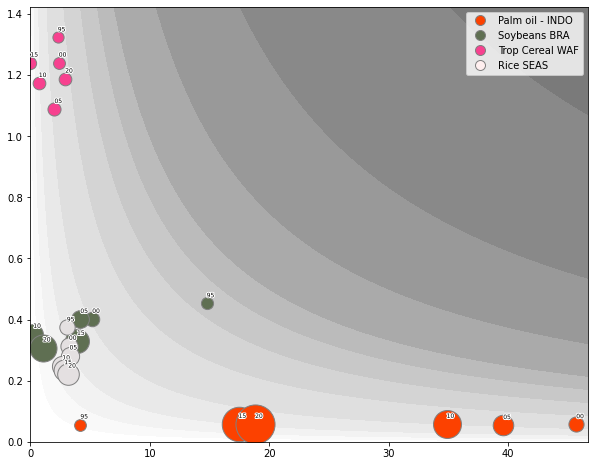

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects

plt.figure(figsize=(10, 8))

crop_footprint_selected_multiyear = carbon_footprint_multiyears_sorted_array_selected
yields_selected_mulityears = yield_FAO_average_array_selected.flatten()
land_effeciency_selected_multiyears = 1 / yields_selected_mulityears

n_points = 100
carbon_footprint_contour_multiyear = np.linspace(0, np.max(crop_footprint_selected_multiyear) + 1, n_points)
df2_contour_multiyear = np.linspace(0, np.max(land_effeciency_selected_multiyears) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour_multiyear, df2_contour_multiyear)
Z = X * Y  # z = total emissions / yield = emissions per hectare

# Plot
class_ranges_multiyear = [0.1, 0.2, 0.5, 1, 2, 4, 6, 8, 10, 15, 25, 50, 70]

# Create a sliced colormap
base_cmap = plt.cm.Greys
colors_multiyear = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors_multiyear)

# Normalize levels for even distribution
norm_multiyear = BoundaryNorm(class_ranges_multiyear, ncolors=custom_cmap.N, clip=True)
contour = plt.contourf(X, Y, Z, levels=class_ranges_multiyear,cmap=custom_cmap, norm=norm_multiyear, edgecolors='Black')

for x, data in enumerate(zip(carbon_footprint_colour_multiyear['region type years'].to_list(), carbon_footprint_colour_multiyear['colors'].to_list(), carbon_footprint_colour_multiyear['year'])):
    sizes_multiyear = df_norm_multiyears_selected_test[x] * 60
    plt.scatter(crop_footprint_selected_multiyear[x], land_effeciency_selected_multiyears[x], color=data[1], edgecolors='grey', label=data[0], s=sizes_multiyear)
    text_multiyear = plt.text(crop_footprint_selected_multiyear[x], land_effeciency_selected_multiyears[x] + 0.02, data[2], fontsize=6, color='black') 
    text_multiyear.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

from matplotlib.lines import Line2D
color2 = ['#FC4100', '#5F6F52', '#F7418F', '#FFEFEF']
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_item, markersize=10, linestyle='',  markeredgecolor='grey') for color_item in color2]
columns2 = ['Palm oil - INDO','Soybeans BRA', 'Trop Cereal WAF', 'Rice SEAS']
plt.legend(legend_handles, columns2, loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
# plt.xlabel('Crop Footprint (tCO₂-eq/ ha)')
# plt.ylabel('Land intensity for crop production (ha/ton)')
plt.show()

COMBINED